In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!cp /content/drive/MyDrive/PGSS2021/L6-7232021/keras_model.h5 /content/

In [3]:
!cp /content/drive/MyDrive/PGSS2021/L6-7232021/MaskData/with_mask/0-with-mask.jpg /content/

In [22]:
!cp /content/drive/MyDrive/PGSS2021/L6-7232021/MaskData/without_mask/0.jpg /content/

In [23]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
# image = Image.open('0-with-mask.jpg')
image = Image.open('0.jpg')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)


[[0.9994925  0.00050746]]


In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 1280)              410208    
_________________________________________________________________
sequential_3 (Sequential)    (None, 2)                 128300    
Total params: 538,508
Trainable params: 524,428
Non-trainable params: 14,080
_________________________________________________________________


In [25]:
WearingAMask = (prediction==np.max(prediction))[0][1]
print(WearingAMask)

False


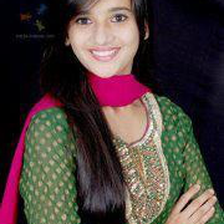

In [26]:
# display the resized image
image